<a href="https://colab.research.google.com/github/SRAVAN01220/burkina-faso-visuals/blob/main/Copy_of_Burkina_Faso_visuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn openpyxl

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Merged_TradeData_Burkino.xlsx to Merged_TradeData_Burkino.xlsx


In [ ]:
import pandas as pd

# Load Excel file (make sure the file name matches exactly)
df = pd.read_excel("Merged_TradeData_Burkino.xlsx", sheet_name="Sheet1")

# Filter for Burkina Faso export records
df_burkina = df[(df["reporterdesc"] == "Burkina Faso") & (df["flowdesc"] == "Export")]

# Preview data
df_burkina.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate,Source File,Sheet Name
0,C,A,20180101,2018,52,2018,854,BFA,Burkina Faso,X,...,0,False,0,4.577540e+08,4.577540e+08,0,False,True,TradeData (43).xlsx,Sheet1
1,C,A,20180101,2018,52,2018,854,BFA,Burkina Faso,X,...,0,False,0,4.577540e+08,4.577540e+08,0,True,False,TradeData (43).xlsx,Sheet1
2,C,A,20190101,2019,52,2019,854,BFA,Burkina Faso,X,...,0,False,0,5.633026e+08,5.633026e+08,0,False,True,TradeData (43).xlsx,Sheet1
3,C,A,20190101,2019,52,2019,854,BFA,Burkina Faso,X,...,0,False,0,5.633026e+08,5.633026e+08,0,True,False,TradeData (43).xlsx,Sheet1
4,C,A,20200101,2020,52,2020,854,BFA,Burkina Faso,X,...,0,False,0,2.915367e+08,2.915367e+08,0,False,True,TradeData (43).xlsx,Sheet1


In [ ]:
df_burkina = df[(df["reporterDesc"] == "Burkina Faso") & (df["flowDesc"] == "Export")]

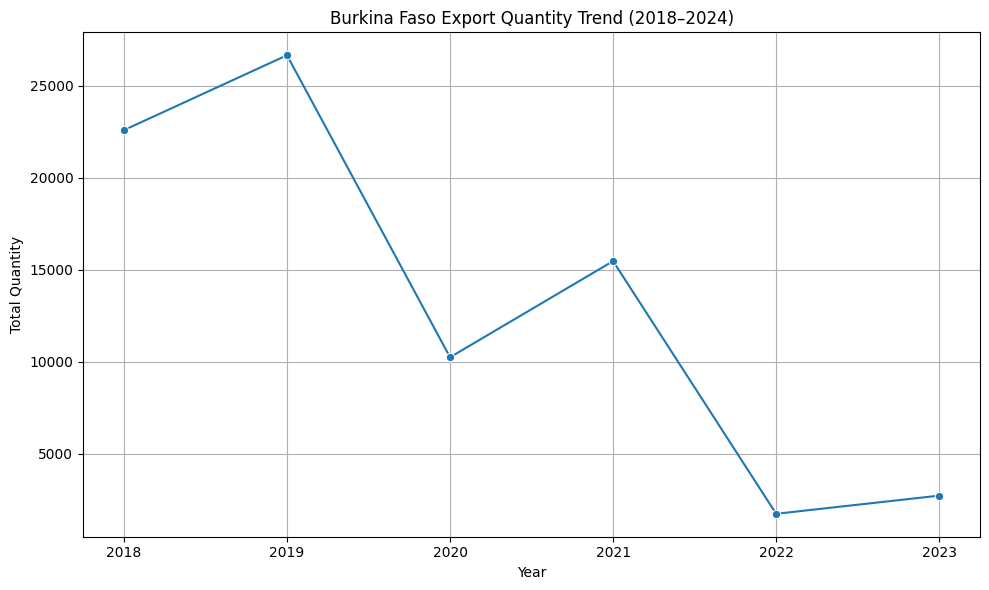

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by year and sum the quantity
trend = df_burkina.groupby("refYear")["qty"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=trend, x="refYear", y="qty", marker="o")
plt.title("Burkina Faso Export Quantity Trend (2018–2024)")
plt.xlabel("Year")
plt.ylabel("Total Quantity")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the plot to a file
plt.savefig("export_trend_burkina.png")

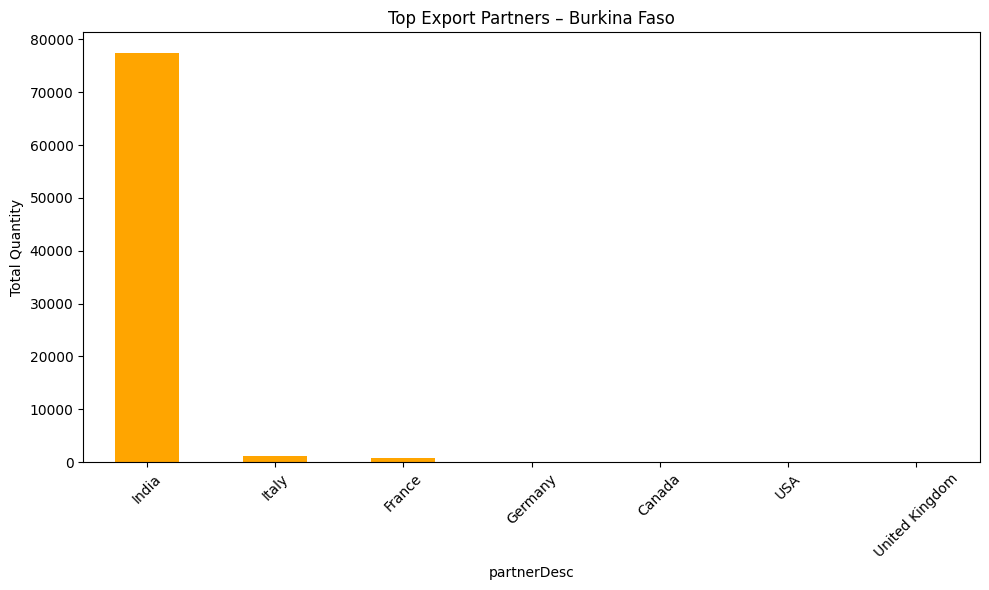

In [ ]:
top_partners = df_burkina.groupby("partnerDesc")["qty"].sum().nlargest(10)

plt.figure(figsize=(10, 6))
top_partners.plot(kind="bar", color="orange")
plt.title("Top Export Partners – Burkina Faso")
plt.ylabel("Total Quantity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

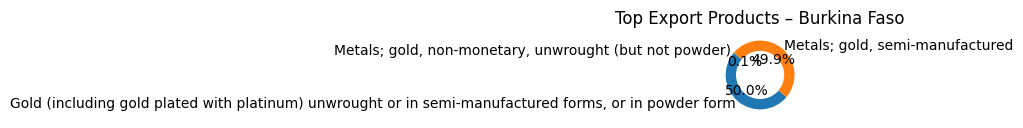

In [ ]:
product_share = df_burkina.groupby("cmdDesc")["qty"].sum().nlargest(5)

plt.figure(figsize=(8, 8))
plt.pie(product_share, labels=product_share.index, autopct="%1.1f%%", startangle=140)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Top Export Products – Burkina Faso")
plt.tight_layout()
plt.show()

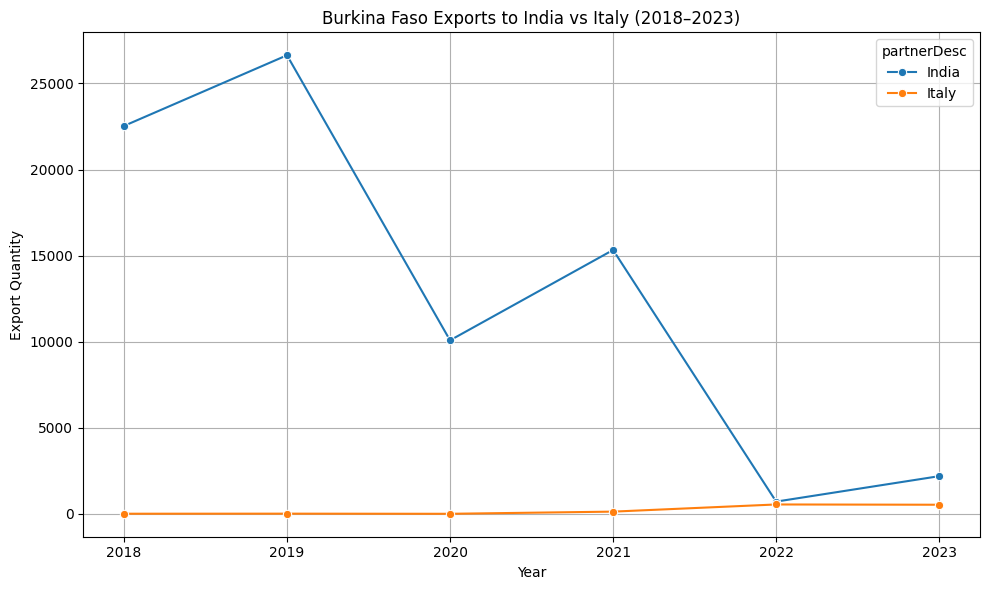

In [ ]:
# Filter India and Italy data
df_compare = df_burkina[df_burkina["partnerDesc"].isin(["India", "Italy"])]

# Group by year and partner
compare_trend = df_compare.groupby(["refYear", "partnerDesc"])["qty"].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=compare_trend, x="refYear", y="qty", hue="partnerDesc", marker="o")
plt.title("Burkina Faso Exports to India vs Italy (2018–2023)")
plt.xlabel("Year")
plt.ylabel("Export Quantity")
plt.grid(True)
plt.tight_layout()
plt.show()

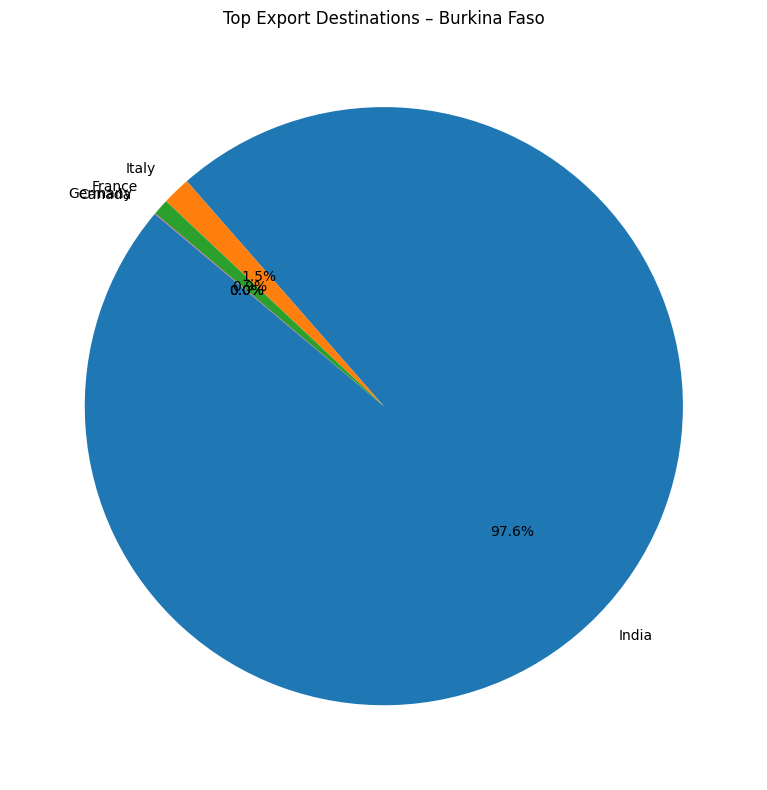

In [ ]:
# Top 5 export destinations
country_share = df_burkina.groupby("partnerDesc")["qty"].sum().nlargest(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_share, labels=country_share.index, autopct="%1.1f%%", startangle=140)
plt.title("Top Export Destinations – Burkina Faso")
plt.tight_layout()
plt.show()